Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

carregando datasets (umm dataset contém dados de vinho branco e outro de vinho tinto)

In [ ]:
import pandas as pd

# carregando datasets (vinho tinto e branco)
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

print("Red wine shape:", df_red.shape)
print("White wine shape:", df_white.shape)

# adicionando coluna indicando o tipo
df_red['type'] = 'red'
df_white['type'] = 'white'

# concatenando os datasets
df = pd.concat([df_red, df_white], ignore_index=True)

print(df.shape)

# convertendo 'white' e 'red' para numérico binário
df['type'] = df['type'].map({'red': 0, 'white': 1})

df.head()

Red wine shape: (1599, 12)
White wine shape: (4898, 12)
(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Removendo duplicatas

In [ ]:
df = df.drop_duplicates()
df.shape

(5320, 13)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,0.282246,0.176086,0.191864,0.068228,0.079219,0.100822,0.249099,0.143152,0.391212,0.176043,0.369455,0.465946,0.744549
std,0.109064,0.112166,0.088649,0.069021,0.061235,0.061823,0.130816,0.057172,0.124325,0.084125,0.171874,0.146629,0.436155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.144578,0.018405,0.048173,0.052083,0.156682,0.098130,0.302326,0.117978,0.217391,0.333333,0.000000
50%,0.264463,0.146667,0.186747,0.032209,0.063123,0.093750,0.253456,0.145363,0.379845,0.162921,0.347826,0.500000,1.000000
75%,0.322314,0.220000,0.240964,0.105828,0.094684,0.138889,0.339286,0.186235,0.472868,0.213483,0.492754,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


gráfico do desvio padrão de cada atributo

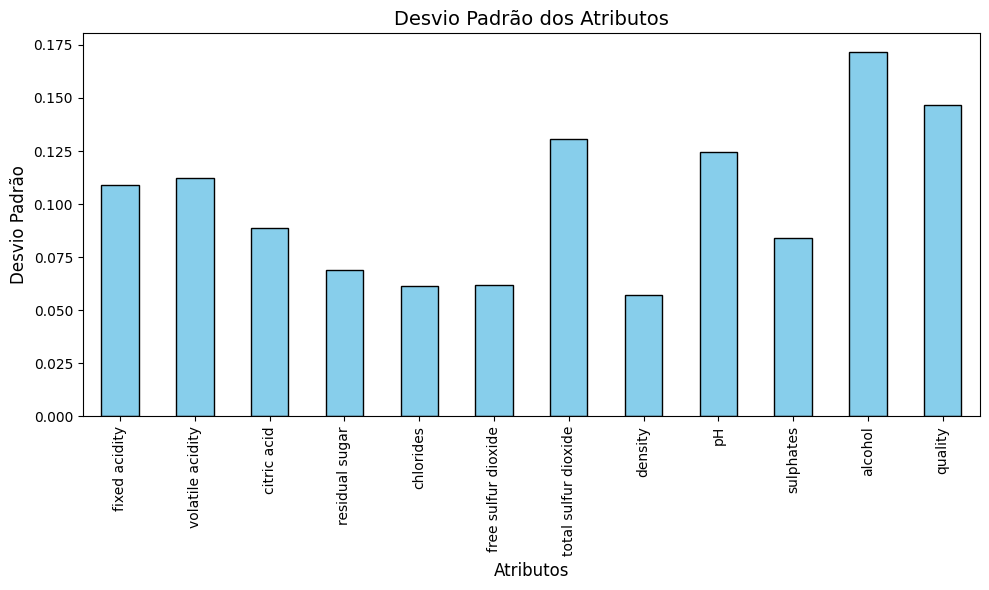

In [ ]:
# Calculando o desvio padrão de cada coluna
desvio_padrao = df_norm.std().drop('type')

# Criando o gráfico
plt.figure(figsize=(10, 6))
desvio_padrao.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Desvio Padrão dos Atributos', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Desvio Padrão', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


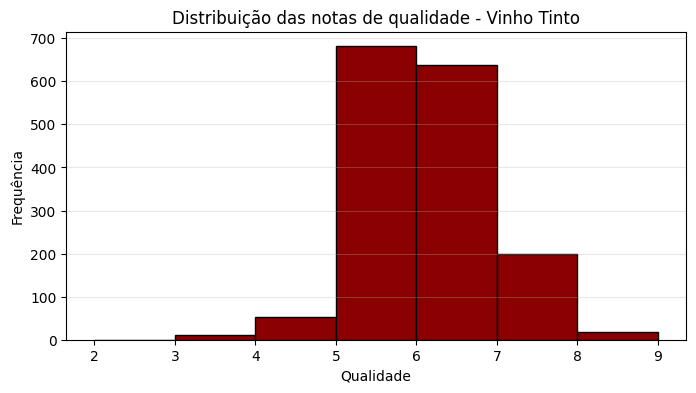

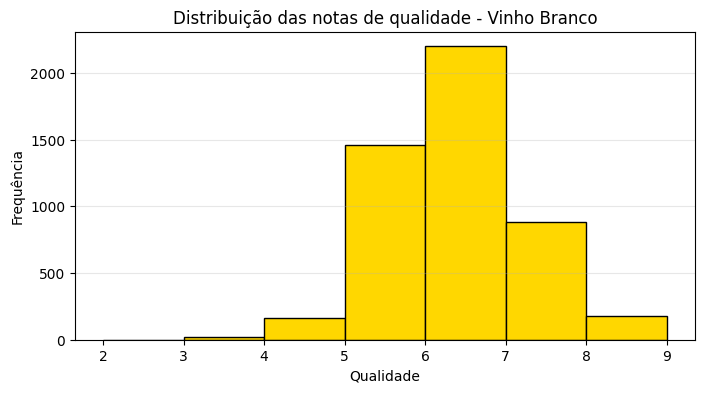

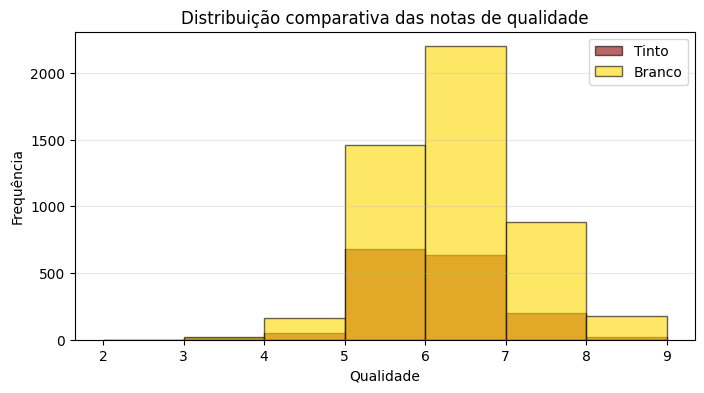

In [ ]:
# distribuição dos vinhos tintos
plt.figure(figsize=(8,4))
plt.hist(df_red["quality"], bins=range(2,10), edgecolor="black", color="darkred")
plt.title("Distribuição das notas de qualidade - Vinho Tinto")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.grid(axis="y", alpha=0.3)
plt.show()

# distribuição dos vinhos brancos
plt.figure(figsize=(8,4))
plt.hist(df_white["quality"], bins=range(2,10), edgecolor="black", color="gold")
plt.title("Distribuição das notas de qualidade - Vinho Branco")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.grid(axis="y", alpha=0.3)
plt.show()

# comparação entre os dois tipos
plt.figure(figsize=(8,4))
plt.hist(df_red["quality"], bins=range(2,10), alpha=0.6, label="Tinto", color="darkred", edgecolor="black")
plt.hist(df_white["quality"], bins=range(2,10), alpha=0.6, label="Branco", color="gold", edgecolor="black")
plt.title("Distribuição comparativa das notas de qualidade")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

Correlação (heatmap)

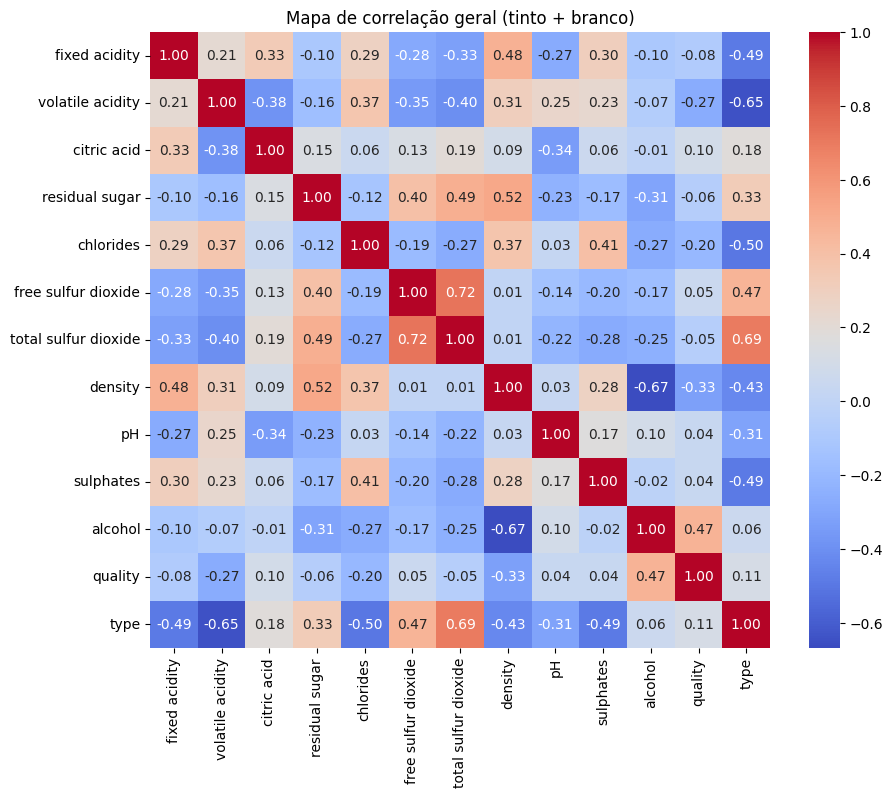


Correlação com a variável alvo (quality):
quality                 1.000000
alcohol                 0.469422
type                    0.114809
citric acid             0.097954
free sulfur dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total sulfur dioxide   -0.050296
residual sugar         -0.056830
fixed acidity          -0.080092
chlorides              -0.202137
volatile acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64


In [ ]:
# correlação geral
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mapa de correlação geral (tinto + branco)')
plt.show()


# correlação ordenada com o atributo alvo 'quality'
print("\nCorrelação com a variável alvo (quality):")
print(corr["quality"].sort_values(ascending=False))

Gráficos boxplot (com os dados normalizados dá na mesma)

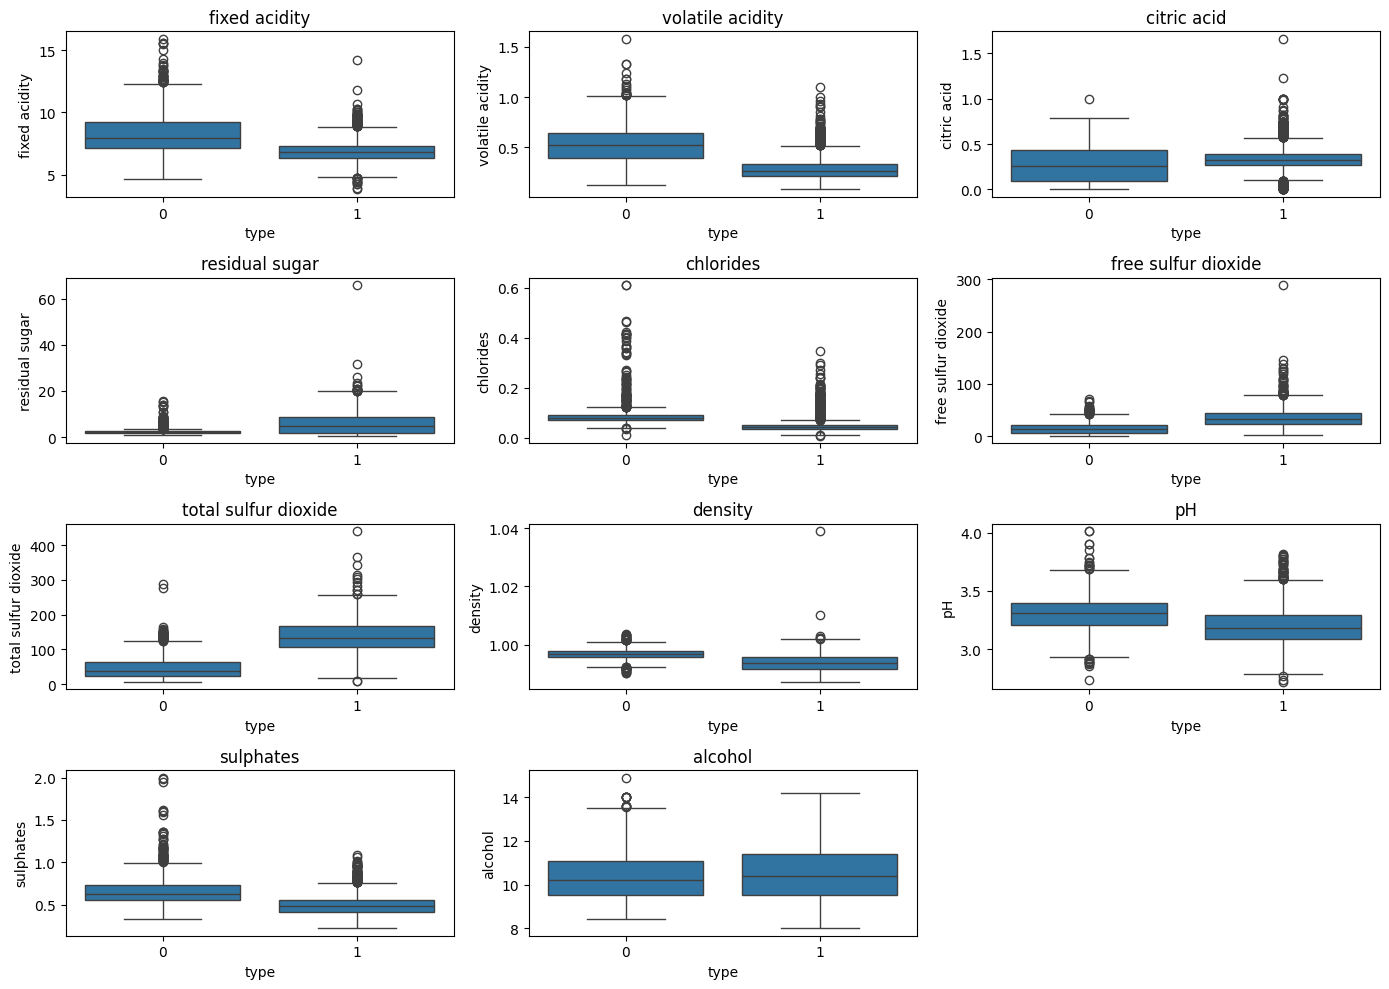

In [ ]:
# lista de atributos (excluindo a target e a coluna 'type')
features = [col for col in df.columns if col not in ['quality', 'type']]

# gera um boxplot para cada atributo (x)
plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='type', y=col, data=df)
    plt.title(col)
    plt.tight_layout()
plt.show()